### 단순 선형 회귀분석

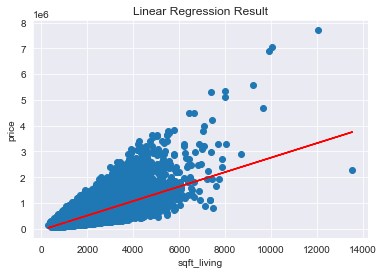

In [41]:
# kc_house_data의 sqft_living을 독립변수, price를 종속변수로 설정하여 단순 선형 회귀분석 해보고, 결과 해석하기
import pandas as pd
house = pd.read_csv('./data/kc_house_data.csv')
house = house[['sqft_living', 'price']]
house.corr()

from statsmodels.formula.api import ols # OLS: Ordinary Least Squares
import matplotlib.pyplot as plt

x = house['sqft_living']
y = house['price']

lr = ols('price ~ sqft_living', data = house).fit()
y_pred = lr.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red') # 회귀직선 추가
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression Result')
plt.show()

#### 위의 차트를 통한 <span >모형이 데이터를 잘 적합하고 있는가?</span>에 대한 해석

* 시각화 결과 직관적으로도 직선이 모든 데이터를 잘 설명하지는 못하고 있는 것으로 보인다.
* 또한, (0, 0)에서 멀어질수록 오차의 분산이 커지는 특정한 패턴을 이루고 있으므로 단순 회귀분석으로는 데이터를 충분히 설명할 수 없는 것으로 보인다.

In [42]:
# 단순 선형 회귀분석의 요약 정보 확인
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        18:38:58   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 위의 요약 정보에 대한 해석

##### 회귀 모형이 통계적으로 유의한가?
* 귀무가설 : 회귀 모형은 통계적으로 유의하지 않다.
* 대립가설 : 회귀 모형은 통계적으로 유의하다.
* 위의 요약 정보에서 F통계량과 p-value인 Prob(F-statistic)을 확인할 수 있는데, p-value가 0이므로 유의수준 0.05 하에 귀무가설을 기각하여 대립가설을 채택한다.
  * 즉, 회귀 모형은 통계적으로 유의하다.

##### 모형은 데이터를 얼마나 설명할 수 있는가?
* $R^{2}=0.493$으로 이 모형이 전체 데이터의 49.3%를 설명한다고 할 수 있다.
> 💡 통계 모델이 유의하다고 하여, 모델의 성능이 좋은 것은 아니다.
* 하지만, $R^{2}=0.493$인 것이 산업에 따라서는 엄청난 정확도를 보이는 것으로 판달할 수도 있다.

##### 모형 내의 회귀 계수는 유의한가?
* intercept는 모형의 상수값이므로 관심사가 아니다.
* 변수인 sqft_living의 회귀계수에 대한 p-value인 P>|t|를 보면, 0이므로 유의수준 0.05 하에 귀무가설을 기각하여 대립가설을 채택한다.
  * 즉, sqft_living은 통계적으로 유의미한 변수로 볼 수 있다.


#### 위의 결과를 모두 종합하여, 전체 데이터의 49.3%를 설명할 수 있는 다음과 같은 회귀식을 도출할 수 있다.
* $\text{Price} = \text{sqft_livng} \times 280.6236 + (-43580.743094)$

---

### 다중 선형 회귀분석

In [43]:
# cars93 데이터로 해보기
import pandas as pd

cars = pd.read_csv('./data/cars93.csv')
cars.drop(columns = 'Unnamed: 0', inplace=True)
cars.info()

# price를 종속변수, enginesize, rpm, weight, length, mpg.city, mpg.highway를 독립변수로 놓고 price에 영향을 주는 변수를 찾기 위한 회귀분석 해보기
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ols 모델의 formula를 정의할 때, 일부 특수문자는 쓸 수 없기에 데이터 전처리
cars.columns = cars.columns.str.replace('.', '')
model = smf.ols(formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data = cars)
result = model.fit()
result.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 20 May 2023   Prob (F-statistic):           4.88e-14
Time:                        18:38:58   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 ####  위의 요약 정보에 대한 해석
* Adj.R-sqaured의 값이 0.542로 낮은 수치를 나타낸다.
* 6개의 변수를 모두 사용하였을 때, Price의 54.2%만을 설명할 수 있다는 의미이다.
* 이제 다중공선성을 확인하고, 변수를 선택하여 더 좋은 회귀식을 찾아보자.

In [44]:
# 다중공선성 파악을 위해 상관관계 파악하기
cars_x = cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']]
cars_x.corr()

EngineSize       RPM    Weight    Length   MPGcity  MPGhighway
EngineSize    1.000000 -0.547898  0.845075  0.780283 -0.710003   -0.626795
RPM          -0.547898  1.000000 -0.427931 -0.441249  0.363045    0.313469
Weight        0.845075 -0.427931  1.000000  0.806274 -0.843139   -0.810658
Length        0.780283 -0.441249  0.806274  1.000000 -0.666239   -0.542897
MPGcity      -0.710003  0.363045 -0.843139 -0.666239  1.000000    0.943936
MPGhighway   -0.626795  0.313469 -0.810658 -0.542897  0.943936    1.000000

#### 상관계수로 알 수 있는 사실
* MPGcity와 MPGhighway는 0.9 이상의 상관성을 보이므로 다중공선성이 존재함을 알 수 있다.
* 하지만 둘 중 어떠한 변수를 제거해야 하는지는 결정하기 애매하다.
* 이때, 다음과 같이 VIF를 구하여 결정할 수 있다.

In [45]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# dmatrices : 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
y, x = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data = cars, return_type = 'dataframe')

# 독립변수끼리의 VIF 값을 계산하여 데이터프레임 만들기
vif_list = []
for i in range(1, len(x.columns)):
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
vif_df = pd.DataFrame(vif_list, columns = ['vif', 'variable'])
vif_df

vif    variable
0   4.605118  EngineSize
1   1.446859         RPM
2   8.685973      Weight
3   4.013002      Length
4  13.668288     MPGcity
5  12.943133  MPGhighway

#### VIF를 통해 알 수 있는 사실
* MPGcity의 VIF가 MPGhighway의 VIF보다 크므로 MPGcity를 제거해야함을 알 수 있다.

In [46]:
# MPGcity를 삭제하고 다시 다중 선형 회귀분석 진행해보기
model = smf.ols(formula= 'Price ~ EngineSize + RPM + Weight + Length +  MPGhighway', data = cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.28e-14
Time:                        18:38:59   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 알 수 있는 사실
* 앞서 분석했던 모델보다 $Adj.R^2$과 AIC의 큰 변화는 없는 것을 알 수 있다.
  * 다중공선성의 제거는 모델의 성능향상보다는 무분별한 변수 선택으로 데이터의 관리가 어려워지는 현상을 막는 것에 의의가 있다.
* MPGcity를 제거하자 MPGhighway의 p-value가 현저히 낮아진 것을 알 수 있다.
  * 이처럼 유의한 변수임에도 다중공선성의 이유로 유의하지 않은 변수처럼 여겨질 수 있다.
    * 따라서 다중공선성은 꼭 해결해야할 과제이다.

In [66]:
# 코드 확인 필요
# 독립변수 중 유의한 변수를 고르고, 모델의 성능을 최적화시키는 변수 선택법 진행해보기

import time
import itertools
import numpy as np

def processSubset(x, y, feature_set) :
    model = sm.OLS(y, x[list(feature_set)]) # modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic
    return {"model":regr, "AIC":AIC}

# 전진선택법
def forward (x, y, predictors) :
    # 데이터 변수들이 미리 정의된 predictores에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['Intercept'])
                            if p not in predictors]
    results = []
    for p in remaining_predictors :
        results.append(processSubset(x=x, y=y, feature_set=predictors+[p]+['Intercept']))

    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in')
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])

    return best_model

# =====

# 후진제거법
def backward(x, y, predictors) :
    tic = time.time()
    results = []

    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors)+1):
        results.append(processSubset(x=x, y=y, feature_set= list(combo)+['Intercept']))
    models = pd.DataFrame(results)

    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()

    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])

    return best_model

# =====

# 단계적 선택법
def Stepwise_model(x, y) :
    Stepmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(x, y, predictors+['Intercept'])['AIC']

    for i in range(1, len(x.columns.difference(['Intercept']))+1) :
        forward_result = forward(x=x, y=y, predictors = predictors)
        print('forward')
        Stepmodels.loc[i] = forward_result
        Stepmodels = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k!='Intercept']
        backward_result = backward(x=x, y=y, predictors = predictors)

        if backward_result['AIC'] < forward_result['AIC'] :
            Stepmodels.loc[i] = backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k!='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print('Total elapsed time:',(toc-tic), 'seconds.')

    return (Stepmodels['model'][len(Stepmodels['model'])])

Stepwise_best_model = Stepwise_model(x=x, y=y)

Processed 6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fafea5b18e0>
forward


KeyError: 'AIC'